In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from re import sub
from decimal import Decimal

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
portal_da_transparencia = {}

# Criando o nome de todos os .csv
for ano in range (2015, 2023):
  for mes in range(1, 13):
    # O Portal da Transparencia possui dados iniciando em 2015/08 até 2022/10
    if ano == 2015 and mes < 8:
      continue
    if ano == 2022 and mes > 10:
      continue

    nome_do_arquivo = str(ano) + '-' + ('0' + str(mes) if mes < 10 else str(mes)) + '.csv'
    nome_da_chave = str(ano) + '_' + ('0' + str(mes) if mes < 10 else str(mes))

    portal_da_transparencia[nome_da_chave] = {
        'completo': pd.read_csv('gdrive/Shareddrives/PTC3567 - Ciência de Dados/EDAs/UNESP/' + nome_do_arquivo, header = 0,
                            names=['ano', 'mes', 'matricula', 'nome', 'jornada', 'funcao', 
                                   'vencimentos', 'remuneracao', 'descontos', 'redutor_constitucional', 'salario_liquido', 
                                   'adicionais_por_tempo_de_servico', 'situacao']),
    }

In [20]:
# Imprimindo o tamanho de cada base de dados
for item in portal_da_transparencia.items():
  print(item[0], len(item[1]['completo']))

2015_08 15407
2015_09 15414
2015_10 15421
2015_11 15434
2015_12 15435
2016_01 15443
2016_02 15488
2016_03 15479
2016_04 15484
2016_05 15499
2016_06 15505
2016_07 15515
2016_08 15520
2016_09 15529
2016_10 15532
2016_11 15537
2016_12 15539
2017_01 15544
2017_02 15564
2017_03 15572
2017_04 15574
2017_05 15579
2017_06 15584
2017_07 15593
2017_08 15593
2017_09 15596
2017_10 15597
2017_11 15598
2017_12 15598
2018_01 15601
2018_02 15607
2018_03 15614
2018_04 15618
2018_05 15619
2018_06 15630
2018_07 15635
2018_08 15647
2018_09 15653
2018_10 15655
2018_11 15655
2018_12 15656
2019_01 15657
2019_02 15691
2019_03 15751
2019_04 15881
2019_05 15979
2019_06 16025
2019_07 15987
2019_08 15974
2019_09 15986
2019_10 15978
2019_11 15960
2019_12 15770
2020_01 15563
2020_02 15571
2020_03 15657
2020_04 15644
2020_05 15623
2020_06 15656
2020_07 15703
2020_08 15748
2020_09 15753
2020_10 15741
2020_11 15734
2020_12 15701
2021_01 15635
2021_02 15585
2021_03 15494
2021_04 15481
2021_05 15585
2021_06 15658
2021_0

In [35]:
def pre_processamento(df):
  for i, row in df.iterrows():
    # Transformando o salario em formato textual para float
    # Para isto, removendo o simbolo "R$ " e substituindo virgula por ponto, devido ao sistema estadunisense de representacao de numeros
    
    vencimentos = float(row['vencimentos'].replace("R$ ", "").replace(".","").replace(",","."))
    df.at[i, 'vencimentos'] = vencimentos  

    salario_liquido = float(row['salario_liquido'].replace("R$ ", "").replace(".","").replace(",","."))
    df.at[i, 'salario_liquido'] = salario_liquido  
  
  # Transformando o tipo do campo para float
  # Necessario para realizar o boxplot da coluna
  df = df.astype({'vencimentos': float, 'salario_liquido': float})

  return df

In [36]:
# Organizacao/limpeza dos dados
for item in portal_da_transparencia.items():
   # Criando o dataset de apenas servidores ativos
  item[1]["ativos"] = item[1]["completo"][item[1]["completo"]['situacao'] == 'Ativo']
  print('Base de dados:', item[0], "Tamanho da base de dados completa",  item[1]["completo"].shape, 'Tamanho da base de dados com apenas servidores ativos', item[1]["ativos"].shape)
  
  # Aplicando pre-processamento para cada dataset (ativos)
  item[1]["ativos"] = pre_processamento(item[1]["ativos"])

Base de dados: 2015_08 Tamanho da base de dados completa (15407, 13) Tamanho da base de dados com apenas servidores ativos (7576, 13)
Base de dados: 2015_09 Tamanho da base de dados completa (15414, 13) Tamanho da base de dados com apenas servidores ativos (7583, 13)
Base de dados: 2015_10 Tamanho da base de dados completa (15421, 13) Tamanho da base de dados com apenas servidores ativos (7590, 13)
Base de dados: 2015_11 Tamanho da base de dados completa (15434, 13) Tamanho da base de dados com apenas servidores ativos (7603, 13)
Base de dados: 2015_12 Tamanho da base de dados completa (15435, 13) Tamanho da base de dados com apenas servidores ativos (7604, 13)
Base de dados: 2016_01 Tamanho da base de dados completa (15443, 13) Tamanho da base de dados com apenas servidores ativos (7612, 13)
Base de dados: 2016_02 Tamanho da base de dados completa (15488, 13) Tamanho da base de dados com apenas servidores ativos (7656, 13)
Base de dados: 2016_03 Tamanho da base de dados completa (1547

In [23]:
# Analisando os cargos
cargos = pd.Series(dtype=object)  
for item in portal_da_transparencia.items():
  cargos = pd.concat([cargos, item[1]["ativos"]['funcao']])

# ANOTACAO: Caso formos realizar a H2, essa é a quantidade de cargos que precisam de mapeamento
print("Quantidade de cargos em todas as bases de dados:", len(pd.unique(cargos)))
print(pd.unique(cargos))

Quantidade de cargos em todas as bases de dados: 127
['ASSIST TEC ADM I' 'OFICIAL DE ADM UNIV' 'ASSIST TEC ADM II'
 'ASSIST ADMINIST II' 'ECONOMISTA' 'OFICIAL DE SERV GRAF'
 'TEC CONTABILIDADE' 'ENGENHEIRO' 'MOTORISTA' 'ASSIST SUP ACAD I'
 'ANALISTA INFORM II' 'ASSIST SUP ACAD III' 'HISTORIOGRAFO'
 'ASSIST SUP ACAD II' 'METEOROLOGISTA' 'ASSES TEC GABINETE'
 'ENGENHEIRO AGRONOMO' 'PRODUTOR' 'JORNALISTA' 'OP DE RADIO' 'LOCUTOR'
 'ASSES ADM I' 'ASSIST ADMINIST I' 'BIOLOGO' 'ASSIST DE INFORM II'
 'ANALISTA INFORM I' 'DISCOTECARIO PROGRAM' 'ANALISTA O&M CONSULT'
 'PESQUISADOR III' 'PESQUISADOR II' 'PROF TITULAR' 'TEC EM ELETRONICA'
 'ASSIST TEC DIR III' 'BIBLIOTECARIO' 'PROF ADJUNTO MS5.3'
 'ASSIST TEC DIR I' 'AG DE VIG E RECEPCAO' 'ASSIST TEC GAB I'
 'PR UNIV ASSES JUR' 'PR UNIV ASSIST JUR' 'ASSIST OPER II' 'ASSES ADM II'
 'PROF ADJUNTO MS5.2' 'PROF ASSIST DR MS3.1' 'PROF ASSIST DR MS3.2'
 'PROF ADJUNTO MS5.1' 'CONTADOR' 'ARQUITETO' 'PR UNIV ASSES JUR CH'
 'AUX DE CAMPO' 'PROF ASSISTENTE' 

In [24]:
# Cargos com a maior media de salario
for item in portal_da_transparencia.items():
  print("Base de dados:", item[0], "Cargo:", item[1]["ativos"].groupby('funcao').salario_liquido.mean().idxmax())

Base de dados: 2015_08 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2015_09 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2015_10 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2015_11 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2015_12 Cargo: ANALISTA O&M CONSULT
Base de dados: 2016_01 Cargo: TEC ESPECIALIZADO
Base de dados: 2016_02 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_03 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_04 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_05 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_06 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_07 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_08 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_09 Cargo: ANALISTA O&M CONSULT
Base de dados: 2016_10 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_11 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2016_12 Cargo: ANALISTA O&M CONSULT
Base de dados: 2017_01 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2017_02 Cargo: PR UNIV ASSES JUR CH
Base de dados: 2017_03 Cargo: PR U

In [25]:
# Para cada base, imprime o maior salario e a pessoa que o recebe
for item in portal_da_transparencia.items():
  print("Base de dados:", item[0], "Maior salario:", item[1]['ativos']['salario_liquido'].max())
  print(item[1]['ativos'].loc[item[1]['ativos']['salario_liquido'].idxmax()])
  print("\n")

Base de dados: 2015_08 Maior salario: 37297.91
ano                                                  2015
mes                                                     8
matricula                                       0583515-0
nome                               MARCELO REICHER SOARES
jornada                                                40
funcao                               PROF ASSIST DR MS3.2
vencimentos                                  R$ 46.220,05
remuneracao                                  R$ 16.064,42
descontos                                     R$ 8.922,14
redutor_constitucional                            R$ 0,00
salario_liquido                                  37297.91
adicionais_por_tempo_de_servico                       NaN
situacao                                            Ativo
Name: 14579, dtype: object


Base de dados: 2015_09 Maior salario: 38336.49
ano                                                        2015
mes                                                        

In [26]:
# ANOTACAO: adicionais_por_tempo_de_servico e salario_liquido estão relacionadas com 40%
for item in portal_da_transparencia.items():
  print("Base de dados:", item[0])
  print(item[1]['ativos'].corr())
  print("---------------------------------")

Base de dados: 2015_08
                                 ano  mes  jornada  salario_liquido  \
ano                              NaN  NaN      NaN              NaN   
mes                              NaN  NaN      NaN              NaN   
jornada                          NaN  NaN  1.00000          0.09344   
salario_liquido                  NaN  NaN  0.09344          1.00000   
adicionais_por_tempo_de_servico  NaN  NaN      NaN              NaN   

                                 adicionais_por_tempo_de_servico  
ano                                                          NaN  
mes                                                          NaN  
jornada                                                      NaN  
salario_liquido                                              NaN  
adicionais_por_tempo_de_servico                              NaN  
---------------------------------
Base de dados: 2015_09
                                 ano  mes   jornada  salario_liquido  \
ano                

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


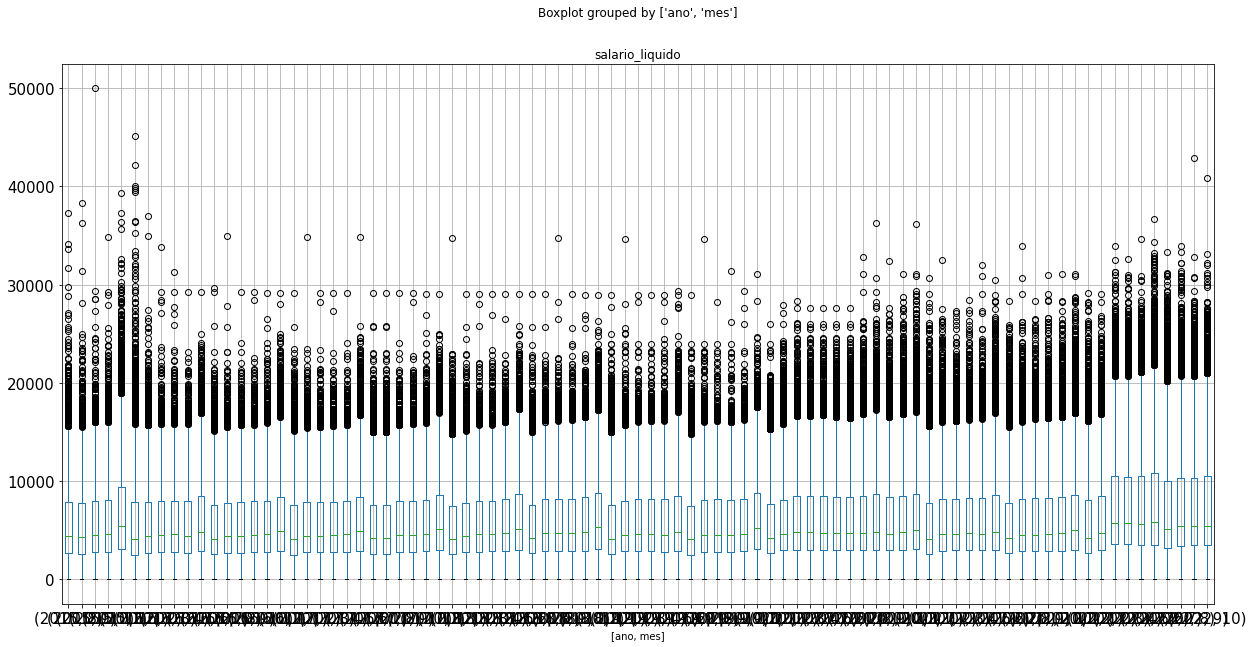

In [27]:
# Distribuicao do salario liquido por base de dados

portais = []
for item in portal_da_transparencia.items():
  portais.append(item[1]['ativos'])

todosPortais = pd.concat(portais)
todosPortais.boxplot('salario_liquido', by = ['ano', 'mes'], fontsize = 15, figsize=(20, 10))

# https://blog.hubspot.com/website/pandas-boxplot
# ANOTACAO: Existem diversos outliers para cima

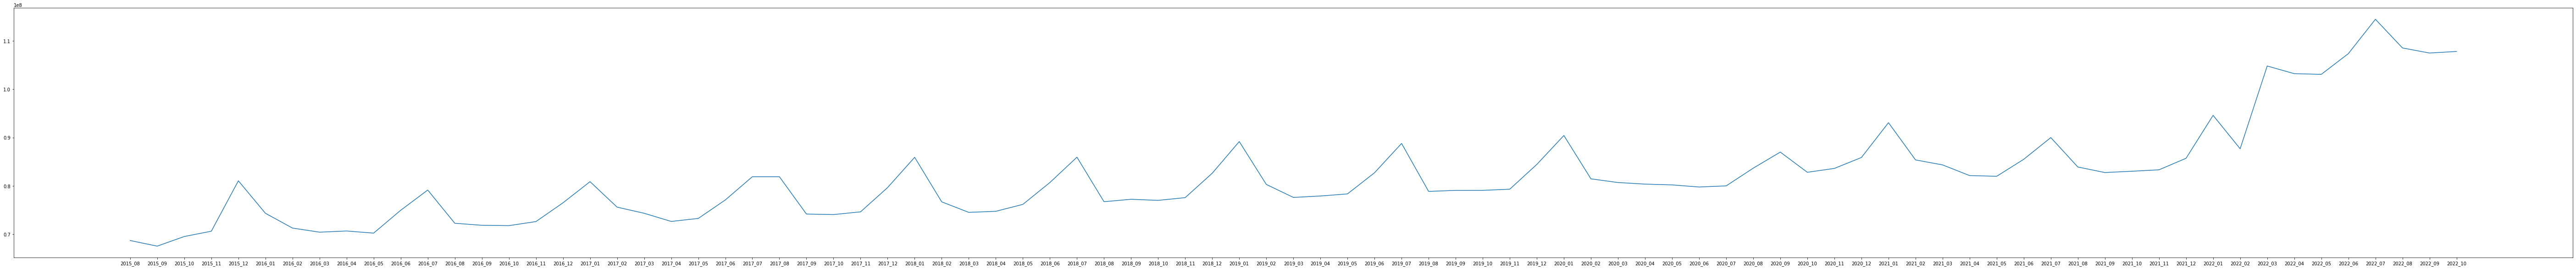

In [50]:
# ANOTACAO: Valor gasto com salario de servidores por mês/ano

x = []
y = []

for item in portal_da_transparencia.items():
  x.append(item[0])
  y.append(item[1]['ativos']['vencimentos'].sum())

plt.figure(figsize=(100, 10))
plt.plot(x, y)
plt.show()

In [ ]:
# Graficos

# index = 1

# for item in portal_da_transparencia.items():
#   plt.subplot(7, 2, index)
#   plt.boxplot(item[1]['ativos']['salario_liquido'])

#   plt.title(item[0])
#   plt.xlabel('salario liquido')
#   plt.ylabel('R$')

#   index = index+1

# plt.suptitle("MY SHOP")
# plt.show()

# # https://www.w3schools.com/python/matplotlib_subplot.asp
# # https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python

# ------------------------------------------------------------------------

# fig, ax = plt.subplots(7, 2, figsize=(15, 25))
# fig.tight_layout()

# row = 0
# for item in portal_da_transparencia.items():
#   if '_01' in item[0]:
#     column = 0

#     ax[row, column].boxplot(item[1]['ativos']['salario_liquido'])
#     ax[row, column].set_title(item[0])

#   if '_07' in item[0]:
#     column = 1

#     ax[row, column].boxplot(item[1]['ativos']['salario_liquido'])
#     ax[row, column].set_title(item[0])
    
#     row = row + 1

# # https://www.statology.org/subplot-size-matplotlib/